In [25]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from npgamma import calc_gamma

In [26]:
with open('data_unequal_grid.yml', 'r') as file:
    data = yaml.load(file)
    
x_reference = data['x_mephisto']
y_reference = data['d_mephisto']
dose_reference = data['mephisto_dose_grid']

x_evaluation = data['x_monaco']
y_evaluation = data['d_monaco']
dose_evaluation = data['monaco_dose_grid']

coords_reference = (y_reference, x_reference)
coords_evaluation = (y_evaluation, x_evaluation)

In [27]:
print("Reference  dimensions: {0} {1} {2} {3}".format(len(x_reference), len(y_reference), len(dose_reference[0]), len(dose_reference)))
print("Evaluation dimensions: {0} {1} {2} {3}".format(len(x_evaluation), len(y_evaluation), len(dose_evaluation[0]), len(dose_evaluation)))

Reference  dimensions: 51 101 51 101
Evaluation dimensions: 31 61 31 61


In [28]:
dmax_evaluation = np.max(dose_evaluation)
dmax_reference  = np.max(dose_reference)
print(dmax_evaluation, dmax_reference)

100.996187182 100.038456429


In [34]:
distance_threshold = 2
distance_step_size = distance_threshold / 10

dose_threshold = 0.02 * np.max(dose_evaluation)

lower_dose_cutoff = np.max(dose_evaluation) * 0.2

print("Running with {0} {1} {2} {3}".format(distance_threshold, distance_step_size, dose_threshold, lower_dose_cutoff))

Running with 2 0.2 2.0199237436410895 20.199237436410897


In [30]:
gamma = calc_gamma(
    coords_reference, dose_reference,
    coords_evaluation, dose_evaluation,
    distance_threshold, dose_threshold,
    lower_dose_cutoff=lower_dose_cutoff, 
    distance_step_size=distance_step_size,
    maximum_test_distance=np.inf)

In [43]:
print("Gamma parameters: {0}*{1} = {2}".format(len(gamma), len(gamma[0]), len(gamma)*len(gamma[0])))
print(len(gamma[~np.isnan(gamma)])/float(len(gamma)*len(gamma[0])))

Gamma parameters: 61*31 = 1891
0.3881544156530936


(0, 3)

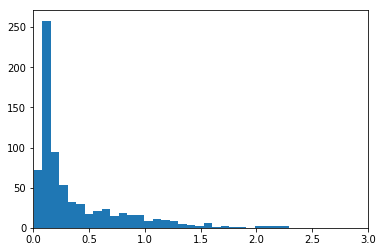

In [45]:
valid_gamma = gamma[~np.isnan(gamma)]
valid_gamma[valid_gamma > 3] = 3

plt.hist(valid_gamma, 30);
plt.xlim([0,3])

In [46]:
np.sum(valid_gamma <= 1) / len(valid_gamma)

0.91008174386920981

Text(0,0.5,'depth (mm)')

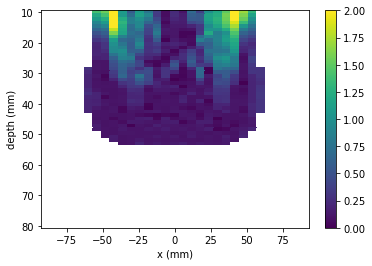

In [47]:
dx = x_evaluation[1] - x_evaluation[0]
x_pcolor = np.arange(x_evaluation[0]-dx/2, x_evaluation[-1] + dx, dx)

dy = y_evaluation[1] - y_evaluation[0]
y_pcolor = np.arange(y_evaluation[0]-dy/2, y_evaluation[-1] + dy, dy)

cut_off_gamma = np.ma.array(gamma, mask=np.isnan(gamma))
cmap = cm.viridis
cmap.set_bad('white',1.)

plt.pcolormesh(x_pcolor, y_pcolor, cut_off_gamma, cmap=cmap, vmin=0, vmax=2)

plt.gca().invert_yaxis()
plt.colorbar()

plt.xlabel('x (mm)')
plt.ylabel('depth (mm)')